print("Hello World!")

In [2]:
#downloading data as a csv file
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetchHousingData(housingUrl = HOUSING_URL , housingPath = HOUSING_PATH):
    if not os.path.isdir(housingPath):
        os.makedirs(housingPath)
    tgz_path = os.path.join(housingPath, "housing.tgz")
    urllib.request.urlretrieve(housingUrl, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housingPath)
    housing_tgz.close()

In [3]:
fetchHousingData()

In [4]:
# getting a dataframe object from the csv file
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
load_housing_data()[:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
load_housing_data().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
load_housing_data().describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


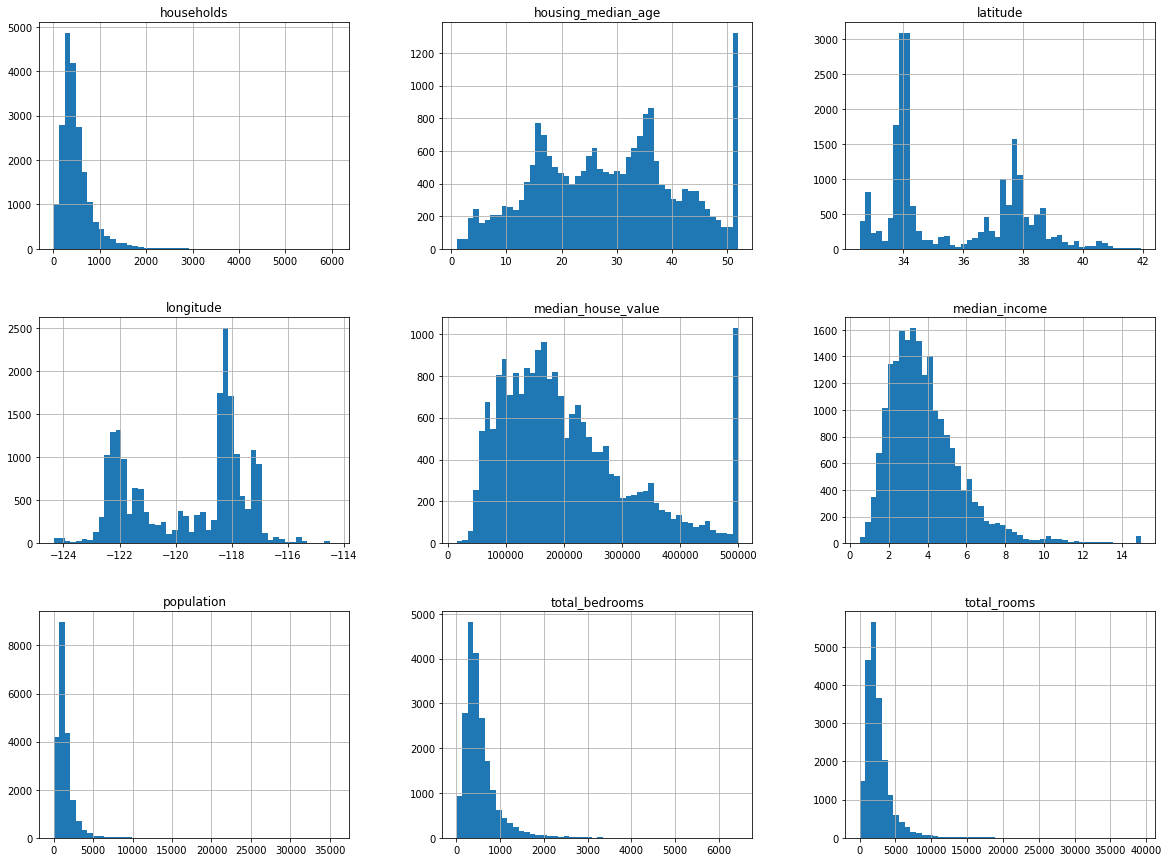

In [8]:
#drawing a histogram wrt each feature
#number of instances on vertical and a given value range on the horizontal axis
%matplotlib inline
housing = load_housing_data()
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2 , random_state = 42)
print(len(train_set), len(test_set))

16512 4128


In [11]:
#creating income strata so that there is a fair representation from all the income categories
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [13]:
housing["income_cat"].value_counts() / len(housing)


3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

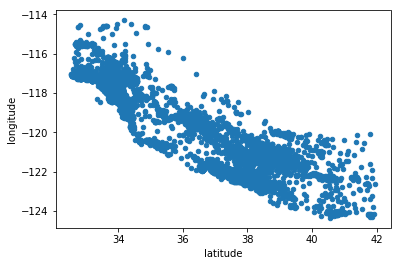

In [14]:
housing = strat_train_set.copy()
housing.plot(kind = "scatter", x = "latitude", y= "longitude")


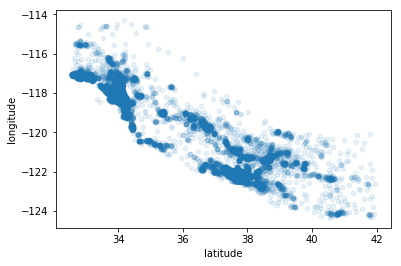

In [15]:
housing.plot(kind = "scatter", x = "latitude", y= "longitude", alpha = 0.1)

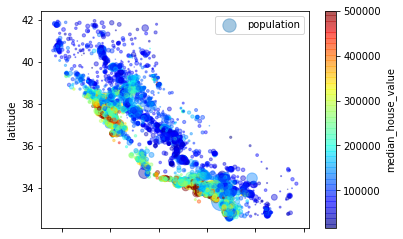

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [17]:
corr_matrix = housing.corr()

In [18]:
 corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

/home/samagra/ml/env/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f028a60eef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f028a6a8208>]], dtype=object)

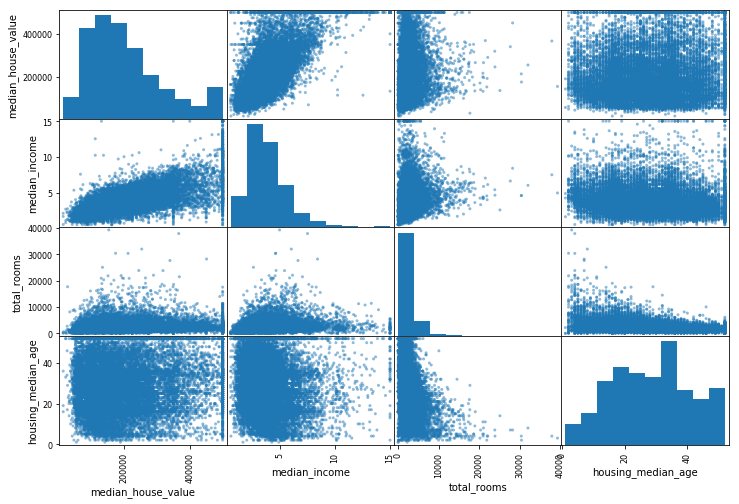

In [19]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


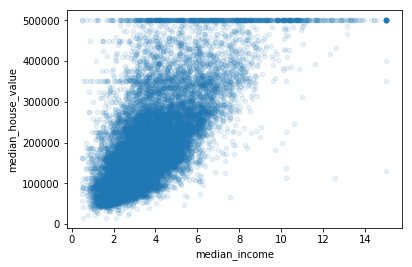

In [20]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

In [21]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

## Looking for correlations

In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

/home/samagra/ml/env/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02805ba908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0280300e10>]], dtype=object)

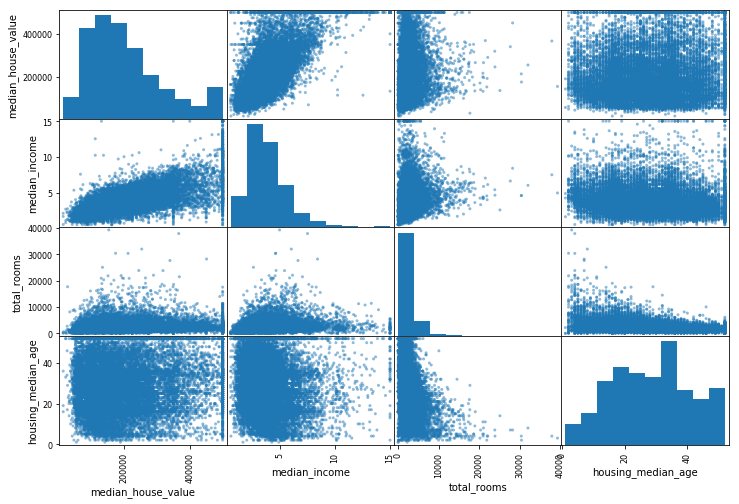

In [23]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

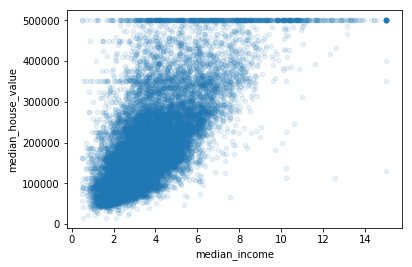

In [24]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

## Preparing the data for ML algorithms

In [25]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data cleaning 

We will fill the missing attributes with median of the rest of the data and hence use the imputer class.

In [26]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")

# to take only numerical attributes
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [27]:
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409,     3.    ])

In [28]:
## replacing the missing medians
X = imputer.transform(housing_num)
## this gives a simple numpy array 
# transform to a dataframe object
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [29]:
housing_tr.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589,3.006541
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950,1.054602
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775,2.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,5.000000


#### To handle non - numeric attributes we first convert them to numerical attributes

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housingCat = housing["ocean_proximity"]
housingCatEncoded = encoder.fit_transform(housingCat)
housingCatEncoded

array([0, 0, 4, ..., 1, 0, 3])

In [31]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


 This method can be somewhat faulty as algos will consider two different categories as somewhat close only if they are close in value. So we will treat all the possible values of the non numeric attribute as a different attribute and give them binary values,

In [32]:
#sklearn proovides a class called one hot encoder which converts text attriburtes into one hot vectors
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housingCatEncoded.reshape(-1,1))
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Custom transformers

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
             bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
             return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
    

In [34]:
housing_extra_attribs[:10]

array([[-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
        '<1H OCEAN', 2.0, 4.625368731563422, 2.094395280235988],
       [-121.93, 37.05, 14.0, 679.0, 108.0, 306.0, 113.0, 6.4214,
        '<1H OCEAN', 5.0, 6.008849557522124, 2.7079646017699117],
       [-117.2, 32.77, 31.0, 1952.0, 471.0, 936.0, 462.0, 2.8621,
        'NEAR OCEAN', 2.0, 4.225108225108225, 2.0259740259740258],
       [-119.61, 36.31, 25.0, 1847.0, 371.0, 1460.0, 353.0, 1.8839,
        'INLAND', 2.0, 5.232294617563739, 4.135977337110481],
       [-118.59, 34.23, 17.0, 6592.0, 1525.0, 4459.0, 1463.0, 3.0347,
        '<1H OCEAN', 3.0, 4.50580997949419, 3.047846889952153],
       [-120.97, 37.66, 24.0, 2930.0, 588.0, 1448.0, 570.0, 3.5395,
        'INLAND', 3.0, 5.140350877192983, 2.5403508771929824],
       [-118.5, 34.04, 52.0, 2233.0, 317.0, 769.0, 277.0, 8.3839,
        '<1H OCEAN', 5.0, 8.061371841155236, 2.776173285198556],
       [-117.24, 34.15, 26.0, 2041.0, 293.0, 936.0, 375.0, 6.0, 'INLAND',
   

## Data transform Pipelines

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [36]:
housing_num_tr[:10]

array([[ -1.15604281e+00,   7.71949616e-01,   7.43330892e-01,
         -4.93233934e-01,  -4.45438207e-01,  -6.36211407e-01,
         -4.20698422e-01,  -6.14937444e-01,  -9.54455952e-01,
         -3.12054519e-01,  -8.64987054e-02,   1.55317530e-01],
       [ -1.17602483e+00,   6.59694795e-01,  -1.16531720e+00,
         -9.08966554e-01,  -1.03692780e+00,  -9.98331347e-01,
         -1.02222705e+00,   1.33645936e+00,   1.89030518e+00,
          2.17683377e-01,  -3.35339129e-02,  -8.36289016e-01],
       [  1.18684903e+00,  -1.34218285e+00,   1.86641864e-01,
         -3.13659889e-01,  -1.53344583e-01,  -4.33639362e-01,
         -9.33177983e-02,  -5.32045602e-01,  -9.54455952e-01,
         -4.65315160e-01,  -9.24049941e-02,   4.22200402e-01],
       [ -1.70676728e-02,   3.13575763e-01,  -2.90520160e-01,
         -3.62762167e-01,  -3.96755937e-01,   3.60409561e-02,
         -3.83435587e-01,  -1.04556555e+00,  -9.54455952e-01,
         -7.96612428e-02,   8.97356110e-02,  -1.96453142e-01],
    

## Custom Transformer for dataframe objects

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [38]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [42]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding = "onehot-dense"))       
    ])

## Combining to make a full pipeline

In [43]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [48]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding = "onehot-dense"))       
    ])
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline)
])

In [49]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [50]:
housing_prepared.shape

(16512, 17)

# Training your model on ML algorithm

### Linear regression

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
## some instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 203682.37379543  326371.39370781  204218.64588245   58685.4770482
  194213.06443039]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


#### Calculating accuracy

In [53]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.642954599374

### Decision Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [55]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions, housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Cross validation score

In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [66]:
def display_scores(scores):
    print("Scores : ", scores)
    print("Mean:",scores.mean())
    print("Standard Deviation :", scores.std())

In [67]:
display_scores(scores)

Scores :  [ -4.89790649e+09  -4.43251202e+09  -5.18269006e+09  -4.70763970e+09
  -5.08407256e+09  -5.65728214e+09  -4.81800021e+09  -4.97267163e+09
  -5.86600940e+09  -4.89813602e+09]
Mean: -5051692022.26
Standard Deviation : 407173496.25


In [68]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores :  [ 66877.52325028  66608.120256    70575.91118868  74179.94799352
  67683.32205678  71103.16843468  64782.65896552  67711.29940352
  71080.40484136  67687.6384546 ]
Mean: 68828.9994845
Standard Deviation : 2662.76157061


In [69]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [70]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22112.540875989125

In [71]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores :  [ 51513.5500248   48821.99364978  53451.63889205  54910.55855153
  50405.68166817  56772.90691171  51909.21824137  50516.14893695
  55699.80788403  53107.7805515 ]
Mean: 52710.9285312
Standard Deviation : 2414.72717912


### Save your models for later use
    from sklearn.externals import joblib
    joblib.dump(my_model, "my_model.pkl")
    # and later...
    my_model_loaded = joblib.load("my_model.pkl")

# Fine tune your model

## Grid Search

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [73]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [74]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

64009.185473 {'n_estimators': 3, 'max_features': 2}
55734.7306672 {'n_estimators': 10, 'max_features': 2}
53429.32685 {'n_estimators': 30, 'max_features': 2}
61027.4705981 {'n_estimators': 3, 'max_features': 4}
53402.4410998 {'n_estimators': 10, 'max_features': 4}
51340.6839509 {'n_estimators': 30, 'max_features': 4}
60294.5024032 {'n_estimators': 3, 'max_features': 6}
53189.2731812 {'n_estimators': 10, 'max_features': 6}
50814.7471226 {'n_estimators': 30, 'max_features': 6}
59393.5147394 {'n_estimators': 3, 'max_features': 8}
52773.7377936 {'n_estimators': 10, 'max_features': 8}
50715.7453543 {'n_estimators': 30, 'max_features': 8}
61830.4257512 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
54104.0359587 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
61586.6464426 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
53719.2841928 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
60207.4220992 {'n_estimators': 3, 'max_features': 4, 'bootstrap':

## Evaluate your system on the test set

In [78]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)   # => evaluates to 47,766.0
final_rmse

48354.104900760569

# Exercises

Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don’t worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
param_grid = [
    {'kernel':['linear'],'C':[10,30,100,300,10000,30000,]},
    {'kernel': ['rbf'], 'C':[1,3,10,30,100,300,1000],
    'gamma':[0.01,0.03,0.1,0.3,1,3]}
]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', verbose = 2,n_jobs = 4)
grid_search.fit(housing_prepared,housing_labels)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] kernel=linear, C=10 .............................................
[CV] kernel=linear, C=10 .............................................
[CV] kernel=linear, C=10 .............................................
[CV] kernel=linear, C=10 .............................................
[CV] .............................. kernel=linear, C=10, total=  19.4s
[CV] kernel=linear, C=10 .............................................
[CV] .............................. kernel=linear, C=10, total=  19.6s
[CV] kernel=linear, C=30 .............................................
[CV] .............................. kernel=linear, C=10, total=  19.8s
[CV] kernel=linear, C=30 .............................................
[CV] .............................. kernel=linear, C=10, total=  19.8s
[CV] kernel=linear, C=30 .............................................
[CV] .............................. kernel=linear, C=30, total=  18.8s
[CV] kernel=lin

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  5.3min


[CV] ...................... kernel=rbf, gamma=0.01, C=1, total=  30.9s
[CV] kernel=rbf, gamma=0.03, C=1 .....................................
[CV] ........................... kernel=linear, C=30000, total= 1.5min
[CV] kernel=rbf, gamma=0.03, C=1 .....................................
[CV] ...................... kernel=rbf, gamma=0.03, C=1, total=  31.9s
[CV] kernel=rbf, gamma=0.03, C=1 .....................................
[CV] ...................... kernel=rbf, gamma=0.03, C=1, total=  31.7s
[CV] kernel=rbf, gamma=0.1, C=1 ......................................
[CV] ...................... kernel=rbf, gamma=0.03, C=1, total=  30.9s
[CV] kernel=rbf, gamma=0.1, C=1 ......................................
[CV] ...................... kernel=rbf, gamma=0.03, C=1, total=  31.2s
[CV] kernel=rbf, gamma=0.1, C=1 ......................................
[CV] ...................... kernel=rbf, gamma=0.03, C=1, total=  30.9s
[CV] kernel=rbf, gamma=0.1, C=1 ......................................
[CV] .

[CV] ..................... kernel=rbf, gamma=0.01, C=10, total=  37.9s
[CV] kernel=rbf, gamma=0.03, C=10 ....................................
[CV] ..................... kernel=rbf, gamma=0.01, C=10, total=  45.6s
[CV] kernel=rbf, gamma=0.03, C=10 ....................................
[CV] ..................... kernel=rbf, gamma=0.01, C=10, total=  44.5s
[CV] kernel=rbf, gamma=0.03, C=10 ....................................
[CV] ..................... kernel=rbf, gamma=0.01, C=10, total=  44.2s
[CV] kernel=rbf, gamma=0.03, C=10 ....................................
[CV] ..................... kernel=rbf, gamma=0.03, C=10, total=  40.5s
[CV] kernel=rbf, gamma=0.03, C=10 ....................................
[CV] ..................... kernel=rbf, gamma=0.03, C=10, total=  40.0s
[CV] kernel=rbf, gamma=0.1, C=10 .....................................
[CV] ..................... kernel=rbf, gamma=0.03, C=10, total=  40.1s
[CV] kernel=rbf, gamma=0.1, C=10 .....................................
[CV] .

[CV] ........................ kernel=rbf, gamma=3, C=30, total=  40.5s
[CV] kernel=rbf, gamma=0.01, C=100 ...................................
[CV] .................... kernel=rbf, gamma=0.01, C=100, total=  40.6s
[CV] kernel=rbf, gamma=0.01, C=100 ...................................
[CV] .................... kernel=rbf, gamma=0.01, C=100, total=  38.0s
[CV] kernel=rbf, gamma=0.03, C=100 ...................................
[CV] .................... kernel=rbf, gamma=0.01, C=100, total=  34.8s
[CV] kernel=rbf, gamma=0.03, C=100 ...................................
[CV] .................... kernel=rbf, gamma=0.01, C=100, total=  34.4s
[CV] kernel=rbf, gamma=0.03, C=100 ...................................


[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 31.7min


[CV] .................... kernel=rbf, gamma=0.01, C=100, total=  33.7s
[CV] kernel=rbf, gamma=0.03, C=100 ...................................
[CV] .................... kernel=rbf, gamma=0.03, C=100, total=  37.5s
[CV] kernel=rbf, gamma=0.03, C=100 ...................................
[CV] .................... kernel=rbf, gamma=0.03, C=100, total=  37.0s
[CV] kernel=rbf, gamma=0.1, C=100 ....................................
[CV] .................... kernel=rbf, gamma=0.03, C=100, total=  35.2s
[CV] kernel=rbf, gamma=0.1, C=100 ....................................
[CV] .................... kernel=rbf, gamma=0.03, C=100, total=  36.0s
[CV] kernel=rbf, gamma=0.1, C=100 ....................................
[CV] .................... kernel=rbf, gamma=0.03, C=100, total=  36.0s
[CV] kernel=rbf, gamma=0.1, C=100 ....................................
[CV] ..................... kernel=rbf, gamma=0.1, C=100, total=  36.2s
[CV] kernel=rbf, gamma=0.1, C=100 ....................................
[CV] .

[CV] ................... kernel=rbf, gamma=0.01, C=1000, total=  33.2s
[CV] kernel=rbf, gamma=0.03, C=1000 ..................................
[CV] ................... kernel=rbf, gamma=0.01, C=1000, total=  33.3s
[CV] kernel=rbf, gamma=0.03, C=1000 ..................................
[CV] ................... kernel=rbf, gamma=0.01, C=1000, total=  30.0s
[CV] kernel=rbf, gamma=0.03, C=1000 ..................................
[CV] ................... kernel=rbf, gamma=0.03, C=1000, total=  29.1s
[CV] kernel=rbf, gamma=0.03, C=1000 ..................................
[CV] ................... kernel=rbf, gamma=0.03, C=1000, total=  29.3s
[CV] kernel=rbf, gamma=0.1, C=1000 ...................................
[CV] ................... kernel=rbf, gamma=0.03, C=1000, total=  29.6s
[CV] kernel=rbf, gamma=0.1, C=1000 ...................................
[CV] ................... kernel=rbf, gamma=0.03, C=1000, total=  28.9s
[CV] kernel=rbf, gamma=0.1, C=1000 ...................................
[CV] .

[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed: 48.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear'], 'C': [10, 30, 100, 300, 10000, 30000]}, {'kernel': ['rbf'], 'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3], 'C': [1, 3, 10, 30, 100, 300, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=2)

In [86]:
grid_search.best_params_


{'C': 30000, 'kernel': 'linear'}